In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
from datetime import datetime
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotnine import *
import streamlit as st

import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_excel(r'C:\Users\admin\OneDrive\Desktop\Prajesh\Office\datasets\Book2_excel.xlsx')
df.head()

,Section,Row,Quantity,Display_Price_Per_Ticket_Amount,Delivery_Option,Delivery_Method_ID,Section_ID,Transaction_Date
0,Club Hall of Fame,12,2,388.50,EXTERNAL_TRANSFER,60,1784554,2021-04-15
1,Club Hall of Fame,22,2,425.88,EXTERNAL_TRANSFER,60,1784554,2021-04-07
2,Club Hall of Fame,1,4,408.00,EXTERNAL_TRANSFER,60,1784832,2021-05-03
3,Club Hall of Fame,10,2,514.87,EXTERNAL_TRANSFER,60,1784832,2021-04-14
4,Club Hall of Fame,19,4,444.00,EXTERNAL_TRANSFER,60,1784516,2021-03-24


In [7]:
df2 = df[["Section","Quantity","Transaction_Date"]]

In [8]:
df2.head()

,Section,Quantity,Transaction_Date
0,Club Hall of Fame,2,2021-04-15
1,Club Hall of Fame,2,2021-04-07
2,Club Hall of Fame,4,2021-05-03
3,Club Hall of Fame,2,2021-04-14
4,Club Hall of Fame,4,2021-03-24


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Section           1367 non-null   object        
 1   Quantity          1367 non-null   int64         
 2   Transaction_Date  1367 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 32.2+ KB


In [10]:
df3 = df2.sort_values(by = "Transaction_Date")

In [11]:
df3.head()

,Section,Quantity,Transaction_Date
590,Main,2,2021-03-23
348,Hall of Fame,3,2021-03-23
347,Hall of Fame,2,2021-03-23
346,Hall of Fame,7,2021-03-23
576,Main,4,2021-03-23


In [12]:
df4 = df3.groupby(['Section','Transaction_Date'],as_index =  False)['Quantity'].sum()
df4

,Section,Transaction_Date,Quantity
0,Club Hall of Fame,2021-03-23,6
1,Club Hall of Fame,2021-03-24,12
2,Club Hall of Fame,2021-03-25,2
3,Club Hall of Fame,2021-03-26,9
4,Club Hall of Fame,2021-03-27,4
...,...,...,...
328,Upper Reserved,2021-05-05,53
329,Upper Reserved,2021-05-06,79
330,Upper Reserved,2021-05-07,138
331,Upper Reserved,2021-05-08,311


In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Section           333 non-null    object        
 1   Transaction_Date  333 non-null    datetime64[ns]
 2   Quantity          333 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.9+ KB


In [14]:
df5 = df4.loc[(df4["Transaction_Date"]>= "2021-03-23")&(df4["Transaction_Date"]<= "2021-03-31")]

In [15]:
df5

,Section,Transaction_Date,Quantity
0,Club Hall of Fame,2021-03-23,6
1,Club Hall of Fame,2021-03-24,12
2,Club Hall of Fame,2021-03-25,2
3,Club Hall of Fame,2021-03-26,9
4,Club Hall of Fame,2021-03-27,4
...,...,...,...
290,Upper Reserved,2021-03-27,6
291,Upper Reserved,2021-03-28,14
292,Upper Reserved,2021-03-29,16
293,Upper Reserved,2021-03-30,12


In [16]:
names = ['Club Hall of Fame','Main']
df6 = df5[df5.Section.isin(names)]

In [17]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 216
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Section           16 non-null     object        
 1   Transaction_Date  16 non-null     datetime64[ns]
 2   Quantity          16 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 512.0+ bytes


In [18]:
from plotnine import ggplot, geom_point, aes, stat_smooth, geom_line

trend = (ggplot(df6, aes("Transaction_Date", "Quantity", color="Section"))
 +  geom_line()
 +  stat_smooth(method="lm"))


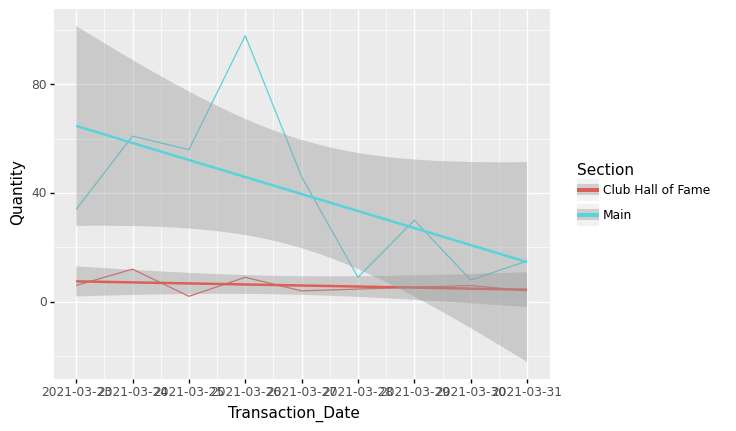

<ggplot: (124642196487)>

In [19]:
trend

In [20]:
train = df6

In [22]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

ValueError: could not convert string to float: 'Club Hall of Fame'